## Goal

> Multiclass classification 

## Library import 

In [97]:
import pandas as pd 
import numpy as np
from datetime import datetime
import seaborn as sns 

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt





## Data import

In [98]:
portfolio = pd.read_json('data/portfolio.json', lines=True)
profile = pd.read_json('data/profile.json', lines=True)
transcript = pd.read_json('data/transcript.json', lines=True)

portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [99]:
profile

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [100]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


## Dataset overview

The program used to create the data simulates how people make purchasing decisions and how those decisions are influenced by promotional offers.
Each person in the simulation has some hidden traits that influence their purchasing patterns and are associated with their observable traits. People produce various events, including receiving offers, opening offers, and making purchases.
As a simplification, there are no explicit products to track. Only the amounts of each transaction or offer are recorded.
There are three types of offers that can be sent: buy-one-get-one (BOGO), discount, and informational. In a BOGO offer, a user needs to spend a certain amount to get a reward equal to that threshold amount. In a discount, a user gains a reward equal to a fraction of the amount spent. In an informational offer, there is no reward, but neither is there a requisite amount that the user is expected to spend. Offers can be delivered via multiple channels.
The basic task is to use the data to identify which groups of people are most responsive to each type of offer, and how best to present each type of offer.



## Data Dictionary


**profile.json**
Rewards program users (17000 users x 5 fields)

gender: (categorical) M, F, O, or null
age: (numeric) missing value encoded as 118
id: (string/hash)
became_member_on: (date) format YYYYMMDD
income: (numeric)


**portfolio.json**
Offers sent during 30-day test period (10 offers x 6 fields)

reward: (numeric) money awarded for the amount spent
channels: (list) web, email, mobile, social
difficulty: (numeric) money required to be spent to receive reward
duration: (numeric) time for offer to be open, in days
offer_type: (string) bogo, discount, informational
id: (string/hash)


**transcript.json**
Event log (306648 events x 4 fields)

person: (string/hash)
event: (string) offer received, offer viewed, transaction, offer completed
value: (dictionary) different values depending on event type
offer id: (string/hash) not associated with any "transaction"
amount: (numeric) money spent in "transaction"
reward: (numeric) money gained from "offer completed"
time: (numeric) hours after start of test

## Joining datasets

In [101]:
full = profile.merge(transcript, how= "left", left_on= "id", right_on= "person")

Here we list total number of Nas for each column in the full dataset

In [102]:
full.isna().sum()

gender              33772
age                     0
id                      0
became_member_on        0
income              33772
person                  0
event                   0
value                   0
time                    0
dtype: int64

It seems that our join works fine. All ids are matched between the datasets. Gender and Income are the only columns having missing values. 

In [103]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Here we confirm the missing values in the two columns. Multiple transactions per id caused the missing values in these two columns to increase after the merge.

## Joining the third dataset 

In [104]:
# Function to extract offer_id and amount

def extract_amount(row):
    return row.get('amount')

def extract_offer_id(row):
    if 'offer id' in row:
        return row['offer id']
    elif 'offer_id' in row:
        return row['offer_id']
    else:
        return None

# Create 'offer_id' column using map
full['offer_id'] = full['value'].map(extract_offer_id)

# Create 'amount' column using map
full['amount'] = full['value'].map(extract_amount)

full

,gender,age,id,became_member_on,income,person,event,value,time,offer_id,amount
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},168,2906b810c7d4411798c6938adc9daaa5,NaN
1,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},216,2906b810c7d4411798c6938adc9daaa5,NaN
2,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},336,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
3,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},348,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
4,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,transaction,{'amount': 0.35000000000000003},360,None,0.35
...,...,...,...,...,...,...,...,...,...,...,...
306529,F,62,e4052622e5ba45a8b96b59aba68cf068,20170722,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,480,f19421c1d4aa40978ebb69ca19b0e20d,NaN
306530,F,62,e4052622e5ba45a8b96b59aba68cf068,20170722,82000.0,e4052622e5ba45a8b96b59aba68cf068,transaction,{'amount': 19.47},486,None,19.47
306531,F,62,e4052622e5ba45a8b96b59aba68cf068,20170722,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},546,f19421c1d4aa40978ebb69ca19b0e20d,NaN
306532,F,62,e4052622e5ba45a8b96b59aba68cf068,20170722,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},576,3f207df678b143eea3cee63160fa8bed,NaN


### Validate that all info and offer ids are captured
> Sum of Nas in the new columns should be equal to (not greater than) the full dataset length

In [105]:
assert(full['offer_id'].isna().sum() + full['amount'].isna().sum() == len(full))

## Join the last dataset

In [106]:
full.drop(columns= 'id', inplace=True)

In [107]:
df = full.merge(portfolio, how = "left", left_on="offer_id", right_on="id")

In [108]:
df.drop(columns = ['offer_id', "id", "value"], inplace = True)

In [109]:
df

,gender,age,became_member_on,income,person,event,time,amount,reward,channels,difficulty,duration,offer_type
0,None,118,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,168,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount
1,None,118,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,216,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount
2,None,118,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,336,NaN,5.0,"[web, email]",20.0,10.0,discount
3,None,118,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,348,NaN,5.0,"[web, email]",20.0,10.0,discount
4,None,118,20170212,NaN,68be06ca386d4c31939f3a4f0e3dd783,transaction,360,0.35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,F,62,20170722,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer completed,480,NaN,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
306530,F,62,20170722,82000.0,e4052622e5ba45a8b96b59aba68cf068,transaction,486,19.47,NaN,NaN,NaN,NaN,NaN
306531,F,62,20170722,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer viewed,546,NaN,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
306532,F,62,20170722,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer received,576,NaN,0.0,"[web, email, mobile]",0.0,4.0,informational


### validate data types

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gender            272762 non-null  object 
 1   age               306534 non-null  int64  
 2   became_member_on  306534 non-null  int64  
 3   income            272762 non-null  float64
 4   person            306534 non-null  object 
 5   event             306534 non-null  object 
 6   time              306534 non-null  int64  
 7   amount            138953 non-null  float64
 8   reward            167581 non-null  float64
 9   channels          167581 non-null  object 
 10  difficulty        167581 non-null  float64
 11  duration          167581 non-null  float64
 12  offer_type        167581 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 30.4+ MB


We need to convert became_member_on to datetime

In [111]:
df['became_member_on']

0         20170212
1         20170212
2         20170212
3         20170212
4         20170212
            ...   
306529    20170722
306530    20170722
306531    20170722
306532    20170722
306533    20170722
Name: became_member_on, Length: 306534, dtype: int64

In [112]:
df['became_member_on'] = df['became_member_on'].astype("str")

In [113]:
date_format = "%Y%m%d"

# Convert string to datetime object
df['became_member_on'] = df['became_member_on'].map(lambda x: datetime.strptime(x, date_format).date())
df['became_member_on'] = pd.to_datetime(df['became_member_on'])
df


,gender,age,became_member_on,income,person,event,time,amount,reward,channels,difficulty,duration,offer_type
0,None,118,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,168,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount
1,None,118,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,216,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount
2,None,118,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,336,NaN,5.0,"[web, email]",20.0,10.0,discount
3,None,118,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,348,NaN,5.0,"[web, email]",20.0,10.0,discount
4,None,118,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,transaction,360,0.35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,F,62,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer completed,480,NaN,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
306530,F,62,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,transaction,486,19.47,NaN,NaN,NaN,NaN,NaN
306531,F,62,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer viewed,546,NaN,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
306532,F,62,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer received,576,NaN,0.0,"[web, email, mobile]",0.0,4.0,informational


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gender            272762 non-null  object        
 1   age               306534 non-null  int64         
 2   became_member_on  306534 non-null  datetime64[ns]
 3   income            272762 non-null  float64       
 4   person            306534 non-null  object        
 5   event             306534 non-null  object        
 6   time              306534 non-null  int64         
 7   amount            138953 non-null  float64       
 8   reward            167581 non-null  float64       
 9   channels          167581 non-null  object        
 10  difficulty        167581 non-null  float64       
 11  duration          167581 non-null  float64       
 12  offer_type        167581 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memor

### Numerical columns 

In [115]:
df.describe()

,age,became_member_on,income,time,amount,reward,difficulty,duration
count,306534.000000,306534,272762.000000,306534.000000,138953.000000,167581.00000,167581.000000,167581.000000
mean,60.909367,2016-12-28 01:22:03.830961408,64337.000755,366.382940,12.777356,4.41991,7.850401,6.610737
min,18.000000,2013-07-29 00:00:00,30000.000000,0.000000,0.050000,0.00000,0.000000,3.000000
25%,43.000000,2016-03-22 00:00:00,48000.000000,186.000000,2.780000,2.00000,5.000000,5.000000
50%,57.000000,2017-04-13 00:00:00,62000.000000,408.000000,8.890000,5.00000,10.000000,7.000000
75%,72.000000,2017-11-26 00:00:00,78000.000000,528.000000,18.070000,5.00000,10.000000,7.000000
max,118.000000,2018-07-26 00:00:00,120000.000000,714.000000,1062.280000,10.00000,20.000000,10.000000
std,26.032030,NaN,21243.762941,200.326314,30.250529,3.37336,5.048944,2.136130


In [116]:
df.isna().sum()

gender               33772
age                      0
became_member_on         0
income               33772
person                   0
event                    0
time                     0
amount              167581
reward              138953
channels            138953
difficulty          138953
duration            138953
offer_type          138953
dtype: int64


### Categorical variables

In [117]:
for col in ['gender', 'event', 'difficulty', 'offer_type', 'channels', 'duration']:
    print(f"-"*20)
    print(df[col].value_counts()) 

--------------------
gender
M    155690
F    113101
O      3971
Name: count, dtype: int64
--------------------
event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64
--------------------
difficulty
10.0    72292
5.0     35333
0.0     26066
7.0     20139
20.0    13751
Name: count, dtype: int64
--------------------
offer_type
bogo             71617
discount         69898
informational    26066
Name: count, dtype: int64
--------------------
channels
[web, email, mobile, social]    77733
[web, email, mobile]            43730
[email, mobile, social]         32367
[web, email]                    13751
Name: count, dtype: int64
--------------------
duration
7.0     70170
5.0     37353
10.0    33992
3.0     14305
4.0     11761
Name: count, dtype: int64


All looks good. It seems that we need no cleaning

We need to convert age with value 118 to NAs

In [118]:

df.loc[df['age'] == 118, 'age'] = np.nan


In [119]:
df

,gender,age,became_member_on,income,person,event,time,amount,reward,channels,difficulty,duration,offer_type
0,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,168,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount
1,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,216,NaN,2.0,"[web, email, mobile]",10.0,7.0,discount
2,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,336,NaN,5.0,"[web, email]",20.0,10.0,discount
3,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,348,NaN,5.0,"[web, email]",20.0,10.0,discount
4,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,transaction,360,0.35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,F,62.0,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer completed,480,NaN,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
306530,F,62.0,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,transaction,486,19.47,NaN,NaN,NaN,NaN,NaN
306531,F,62.0,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer viewed,546,NaN,5.0,"[web, email, mobile, social]",5.0,5.0,bogo
306532,F,62.0,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer received,576,NaN,0.0,"[web, email, mobile]",0.0,4.0,informational


Let's split the channels into 4 boolean columns 

In [120]:
# Define the possible options
possible_options = ['web', 'email', 'mobile', 'social']

# Define a function to check if each option is present in the list
def check_option(option_list, option):
    return int(option in option_list)

# Split the column into separate columns using map
for option in possible_options:
    df[option] = df['channels'].map(lambda x: check_option(x, option) if isinstance(x, list) else np.nan)

# Drop the original 'options' column if needed
df.drop(columns=['channels'], inplace=True)

df

,gender,age,became_member_on,income,person,event,time,amount,reward,difficulty,duration,offer_type,web,email,mobile,social
0,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,168,NaN,2.0,10.0,7.0,discount,1.0,1.0,1.0,0.0
1,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,216,NaN,2.0,10.0,7.0,discount,1.0,1.0,1.0,0.0
2,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer received,336,NaN,5.0,20.0,10.0,discount,1.0,1.0,0.0,0.0
3,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,offer viewed,348,NaN,5.0,20.0,10.0,discount,1.0,1.0,0.0,0.0
4,None,NaN,2017-02-12,NaN,68be06ca386d4c31939f3a4f0e3dd783,transaction,360,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,F,62.0,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer completed,480,NaN,5.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0
306530,F,62.0,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,transaction,486,19.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306531,F,62.0,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer viewed,546,NaN,5.0,5.0,5.0,bogo,1.0,1.0,1.0,1.0
306532,F,62.0,2017-07-22,82000.0,e4052622e5ba45a8b96b59aba68cf068,offer received,576,NaN,0.0,0.0,4.0,informational,1.0,1.0,1.0,0.0


In [121]:
# Calculate the time of completion for transactions after viewing an offer
df['com_trans_time'] = np.where(df['event'] == "offer viewed", df['duration'] + df['time'], 0)

# Calculate the cumulative maximum of com_trans_time for each person
df['cummax_com_trans_time'] = df.groupby('person')['com_trans_time'].cummax()

# Identify if a purchase was made after viewing an offer
df['purchased_after_offer'] = (df['time'] < df['cummax_com_trans_time']) & (df['event'] == 'transaction') & (df['person'] == df['person'].shift(1))  # Possibly the person filter is not needed

# Identify the offer type for the subsequent purchase
df['offer_for_purchase'] = np.where((df['purchased_after_offer'].shift(-1)) & (df['event'] == 'offer viewed'), df['offer_type'], pd.NA)

df['viewed_offer_type'] = np.where(df['event'] == "offer viewed", df['offer_type'], pd.NA) 

In [122]:
df.tail(50)

,gender,age,became_member_on,income,person,event,time,amount,reward,difficulty,...,offer_type,web,email,mobile,social,com_trans_time,cummax_com_trans_time,purchased_after_offer,offer_for_purchase,viewed_offer_type
306484,M,61.0,2018-07-13,72000.0,2cb4f97358b841b9a9773a7aa05a9d77,transaction,654,2.42,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,45.0,False,<NA>,<NA>
306485,M,49.0,2017-01-26,73000.0,01d26f638c274aa0b965d24cefe3183f,offer received,0,NaN,5.0,20.0,...,discount,1.0,1.0,0.0,0.0,0.0,0.0,False,<NA>,<NA>
306486,M,49.0,2017-01-26,73000.0,01d26f638c274aa0b965d24cefe3183f,offer received,168,NaN,0.0,0.0,...,informational,1.0,1.0,1.0,0.0,0.0,0.0,False,<NA>,<NA>
306487,M,49.0,2017-01-26,73000.0,01d26f638c274aa0b965d24cefe3183f,transaction,204,3.30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,False,<NA>,<NA>
306488,M,49.0,2017-01-26,73000.0,01d26f638c274aa0b965d24cefe3183f,offer received,336,NaN,0.0,0.0,...,informational,0.0,1.0,1.0,1.0,0.0,0.0,False,<NA>,<NA>
306489,M,49.0,2017-01-26,73000.0,01d26f638c274aa0b965d24cefe3183f,transaction,372,7.58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,False,<NA>,<NA>
306490,M,49.0,2017-01-26,73000.0,01d26f638c274aa0b965d24cefe3183f,transaction,378,8.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,False,<NA>,<NA>
306491,M,49.0,2017-01-26,73000.0,01d26f638c274aa0b965d24cefe3183f,offer viewed,396,NaN,0.0,0.0,...,informational,0.0,1.0,1.0,1.0,399.0,399.0,False,informational,informational
306492,M,49.0,2017-01-26,73000.0,01d26f638c274aa0b965d24cefe3183f,transaction,396,5.93,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,399.0,True,<NA>,<NA>
306493,M,49.0,2017-01-26,73000.0,01d26f638c274aa0b965d24cefe3183f,transaction,402,1.74,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,399.0,False,<NA>,<NA>


## Validating that transactions are following viewing offers

In [123]:
# person1 = df.query('person.isin(["e4052622e5ba45a8b96b59aba68cf068", "68be06ca386d4c31939f3a4f0e3dd783"])')
# person1

In [124]:
# person1['com_trans_time'] = np.where(person1['event'] == "offer viewed", person1['duration'] + person1['time'], 0)

# person1['cummax_com_trans_time'] = person1.groupby('person')['com_trans_time'].cummax()

# print((person1['time'] < person1['cummax_com_trans_time']) & (person1['event'] == 'transaction') & (person1['person'] == person1['person'].shift(1)))

In [125]:
df.columns

Index(['gender', 'age', 'became_member_on', 'income', 'person', 'event',
       'time', 'amount', 'reward', 'difficulty', 'duration', 'offer_type',
       'web', 'email', 'mobile', 'social', 'com_trans_time',
       'cummax_com_trans_time', 'purchased_after_offer', 'offer_for_purchase',
       'viewed_offer_type'],
      dtype='object')

In [126]:
# sum amount by person 
# due to offer or not 
# offer_type 

df_person = df.groupby('person').agg({'gender' : pd.Series.mode, 
                          'age' : "mean", 
                          'became_member_on' : pd.Series.mode,
                          'income' : 'max', 
                          'reward' : 'sum', 
                          'difficulty' : 'mean', 
                            'amount': "sum", 
                            'offer_for_purchase': pd.Series.mode, #lambda x: "No offer" if all(offer == "No offer" for offer in x) else next((offer for offer in x if offer != "No offer"), None), 
                            'viewed_offer_type' : pd.Series.mode,
                        "purchased_after_offer": "sum"})


# next step, of purchased_after_offer = 0 

In [127]:
df_person.columns

Index(['gender', 'age', 'became_member_on', 'income', 'reward', 'difficulty',
       'amount', 'offer_for_purchase', 'viewed_offer_type',
       'purchased_after_offer'],
      dtype='object')

In [128]:
df_person

,gender,age,became_member_on,income,reward,difficulty,amount,offer_for_purchase,viewed_offer_type,purchased_after_offer
person,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,M,33.0,2017-04-21,72000.0,25.0,5.416667,127.60,[],informational,0
00116118485d4dfda04fdbaba9a87b5c,[],NaN,2018-04-25,NaN,20.0,5.000000,4.09,[],bogo,0
0011e0d4e6b944f998e987f904e8c1e5,O,40.0,2018-01-09,57000.0,39.0,7.384615,79.46,[],"[discount, informational]",0
0020c2b971eb4e9188eac86d93036a77,F,59.0,2016-03-04,90000.0,50.0,8.181818,196.86,[],"[bogo, discount, informational]",0
0020ccbbb6d84e358d3414a3ff76cffd,F,24.0,2016-11-11,60000.0,39.0,4.636364,154.05,[],bogo,0
...,...,...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,F,69.0,2015-09-20,83000.0,27.0,6.250000,580.98,"[discount, informational]","[bogo, discount, informational]",2
fff7576017104bcc8677a8d63322b5e1,M,71.0,2017-10-31,73000.0,62.0,9.166667,29.94,[],"[bogo, discount]",0
fff8957ea8b240a6b5e634b6ee8eafcf,M,71.0,2018-02-18,56000.0,24.0,8.000000,12.15,[],"[bogo, discount]",0


Now I am combining the two offer columns into a single one. If an offer is related to a purchase, it's given a priority, else the offer viewed is provided

In [129]:
df_person['offer_type'] = np.where(df_person['offer_for_purchase'].map(lambda d: len(d)) > 0, df_person['offer_for_purchase'], df_person['viewed_offer_type'])


In [ ]:
df_person = df_person.drop(columns = ['viewed_offer_type', 'offer_for_purchase', 'amount']) # I am dropping amount as I am modeling for purchases. A high amount is another way of presenting that someone has purchased

In [131]:
df_person_offer = df_person.copy()
df_person_offer

,gender,age,became_member_on,income,reward,difficulty,purchased_after_offer,offer_type
person,,,,,,,,
0009655768c64bdeb2e877511632db8f,M,33.0,2017-04-21,72000.0,25.0,5.416667,0,informational
00116118485d4dfda04fdbaba9a87b5c,[],NaN,2018-04-25,NaN,20.0,5.000000,0,bogo
0011e0d4e6b944f998e987f904e8c1e5,O,40.0,2018-01-09,57000.0,39.0,7.384615,0,"[discount, informational]"
0020c2b971eb4e9188eac86d93036a77,F,59.0,2016-03-04,90000.0,50.0,8.181818,0,"[bogo, discount, informational]"
0020ccbbb6d84e358d3414a3ff76cffd,F,24.0,2016-11-11,60000.0,39.0,4.636364,0,bogo
...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,F,69.0,2015-09-20,83000.0,27.0,6.250000,2,"[discount, informational]"
fff7576017104bcc8677a8d63322b5e1,M,71.0,2017-10-31,73000.0,62.0,9.166667,0,"[bogo, discount]"
fff8957ea8b240a6b5e634b6ee8eafcf,M,71.0,2018-02-18,56000.0,24.0,8.000000,0,"[bogo, discount]"


In [132]:
df_person_offer.purchased_after_offer.value_counts()

purchased_after_offer
0    9381
1    5020
2    1898
3     571
4     102
5      23
6       4
7       1
Name: count, dtype: int64

In [133]:
df_person_offer['purchased_after_offer_comb'] = pd.cut(df_person_offer['purchased_after_offer'], (-1, 0, 1, 100), labels = ("No purchase", "One purchase", "More than one purchase"))
df_person_offer

,gender,age,became_member_on,income,reward,difficulty,purchased_after_offer,offer_type,purchased_after_offer_comb
person,,,,,,,,,
0009655768c64bdeb2e877511632db8f,M,33.0,2017-04-21,72000.0,25.0,5.416667,0,informational,No purchase
00116118485d4dfda04fdbaba9a87b5c,[],NaN,2018-04-25,NaN,20.0,5.000000,0,bogo,No purchase
0011e0d4e6b944f998e987f904e8c1e5,O,40.0,2018-01-09,57000.0,39.0,7.384615,0,"[discount, informational]",No purchase
0020c2b971eb4e9188eac86d93036a77,F,59.0,2016-03-04,90000.0,50.0,8.181818,0,"[bogo, discount, informational]",No purchase
0020ccbbb6d84e358d3414a3ff76cffd,F,24.0,2016-11-11,60000.0,39.0,4.636364,0,bogo,No purchase
...,...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,F,69.0,2015-09-20,83000.0,27.0,6.250000,2,"[discount, informational]",More than one purchase
fff7576017104bcc8677a8d63322b5e1,M,71.0,2017-10-31,73000.0,62.0,9.166667,0,"[bogo, discount]",No purchase
fff8957ea8b240a6b5e634b6ee8eafcf,M,71.0,2018-02-18,56000.0,24.0,8.000000,0,"[bogo, discount]",No purchase


In [134]:
# Function to convert a string representation of a list to an actual list
def str_to_list(s):
    if isinstance(s, np.ndarray):
        return s.tolist()
    else:
        return [s]
# Apply the function to the 'offer_type' column and explode the lists
df_person_offer['offer_type'] = df_person_offer['offer_type'].map(str_to_list)
df_person_offer

,gender,age,became_member_on,income,reward,difficulty,purchased_after_offer,offer_type,purchased_after_offer_comb
person,,,,,,,,,
0009655768c64bdeb2e877511632db8f,M,33.0,2017-04-21,72000.0,25.0,5.416667,0,[informational],No purchase
00116118485d4dfda04fdbaba9a87b5c,[],NaN,2018-04-25,NaN,20.0,5.000000,0,[bogo],No purchase
0011e0d4e6b944f998e987f904e8c1e5,O,40.0,2018-01-09,57000.0,39.0,7.384615,0,"[discount, informational]",No purchase
0020c2b971eb4e9188eac86d93036a77,F,59.0,2016-03-04,90000.0,50.0,8.181818,0,"[bogo, discount, informational]",No purchase
0020ccbbb6d84e358d3414a3ff76cffd,F,24.0,2016-11-11,60000.0,39.0,4.636364,0,[bogo],No purchase
...,...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,F,69.0,2015-09-20,83000.0,27.0,6.250000,2,"[discount, informational]",More than one purchase
fff7576017104bcc8677a8d63322b5e1,M,71.0,2017-10-31,73000.0,62.0,9.166667,0,"[bogo, discount]",No purchase
fff8957ea8b240a6b5e634b6ee8eafcf,M,71.0,2018-02-18,56000.0,24.0,8.000000,0,"[bogo, discount]",No purchase


Now I will make the unit of analysis the offers viewed. Each observation will be an offer. For simplicity and increasing the sample size, I will build the ML model based on this unit of analysis; the offer. 

In [135]:
offers = df_person_offer.explode('offer_type')

In [136]:
offers

,gender,age,became_member_on,income,reward,difficulty,purchased_after_offer,offer_type,purchased_after_offer_comb
person,,,,,,,,,
0009655768c64bdeb2e877511632db8f,M,33.0,2017-04-21,72000.0,25.0,5.416667,0,informational,No purchase
00116118485d4dfda04fdbaba9a87b5c,[],NaN,2018-04-25,NaN,20.0,5.000000,0,bogo,No purchase
0011e0d4e6b944f998e987f904e8c1e5,O,40.0,2018-01-09,57000.0,39.0,7.384615,0,discount,No purchase
0011e0d4e6b944f998e987f904e8c1e5,O,40.0,2018-01-09,57000.0,39.0,7.384615,0,informational,No purchase
0020c2b971eb4e9188eac86d93036a77,F,59.0,2016-03-04,90000.0,50.0,8.181818,0,bogo,No purchase
...,...,...,...,...,...,...,...,...,...
fff7576017104bcc8677a8d63322b5e1,M,71.0,2017-10-31,73000.0,62.0,9.166667,0,discount,No purchase
fff8957ea8b240a6b5e634b6ee8eafcf,M,71.0,2018-02-18,56000.0,24.0,8.000000,0,bogo,No purchase
fff8957ea8b240a6b5e634b6ee8eafcf,M,71.0,2018-02-18,56000.0,24.0,8.000000,0,discount,No purchase


In [137]:
offers.columns 


Index(['gender', 'age', 'became_member_on', 'income', 'reward', 'difficulty',
       'purchased_after_offer', 'offer_type', 'purchased_after_offer_comb'],
      dtype='object')

In [138]:
offers.isna().sum()

gender                           0
age                           2752
became_member_on                 0
income                        2752
reward                           0
difficulty                       6
purchased_after_offer            0
offer_type                     166
purchased_after_offer_comb       0
dtype: int64

It seems there are a few persons who never viewed an offer. I will exclide them from further analysis

In [164]:
offers_clean = offers.query('~ offer_type.isna()')

In [165]:
offers_clean.isna().sum()

gender                           0
age                           2736
became_member_on                 0
income                        2736
reward                           0
difficulty                       0
purchased_after_offer            0
offer_type                       0
purchased_after_offer_comb       0
dtype: int64

In [168]:
offers_clean = offers_clean.drop(columns = ['purchased_after_offer', 'became_member_on'])

KeyError: "['purchased_after_offer', 'became_member_on'] not found in axis"

In [167]:
offers_clean['gender'] = np.where(offers_clean['gender'].isin(['M', 'F', 'O']), offers_clean['gender'], offers_clean['gender'].mode())


## Exploratory data analysis

what's the distribution of purchases after orders 

c:\Users\HamzaM\python\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


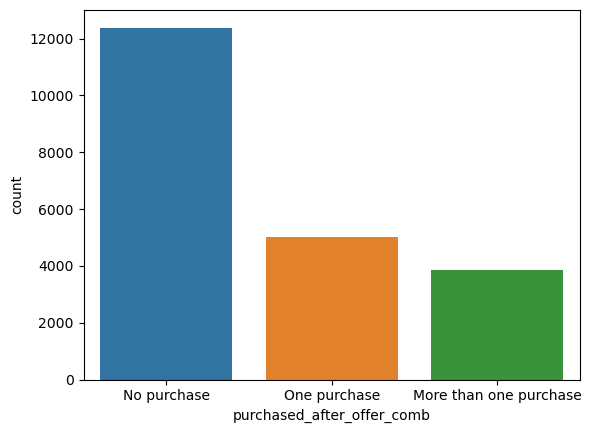

In [170]:
sns.countplot(data = offers_clean, x = 'purchased_after_offer_comb');

When a user views an offer, he won't purchase in the majority of cases. However, there are also some cases where a single user responds to multiple offers multiple times 

How is the offer type related to purchases that follows a viewed offer?

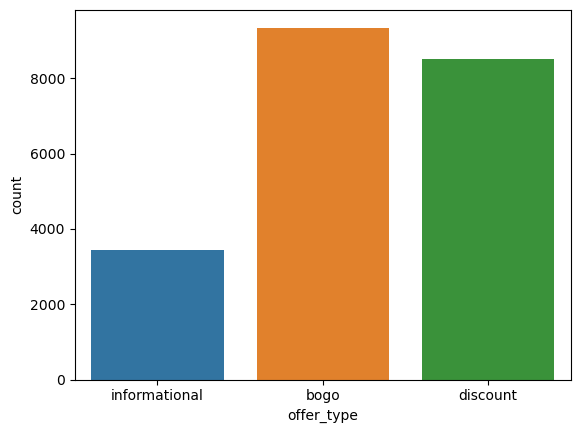

In [171]:
sns.countplot(data = offers_clean, x = "offer_type");

Bogo is the most frequent viewed offer type, followed by discount. 

c:\Users\HamzaM\python\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\HamzaM\python\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


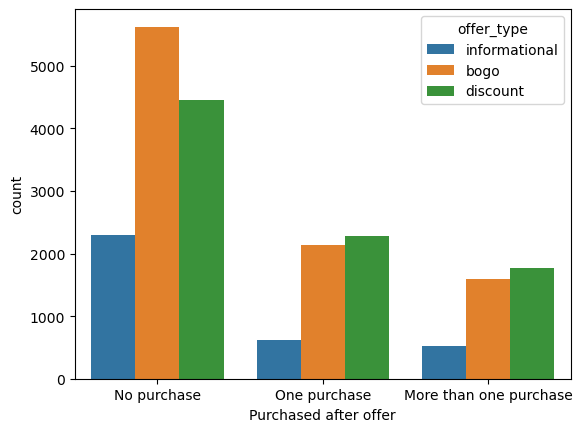

In [172]:
sns.countplot(data = offers_clean, x = 'purchased_after_offer_comb', hue= "offer_type")
plt.xlabel("Purchased after offer");

Eventhough discount was not the most frequent offer viewed in the previous graph, it is the one most commonly associated with frequent or single purchases. This might be an important feature for the ML model. 

In [173]:
offers_clean

,gender,age,income,reward,difficulty,offer_type,purchased_after_offer_comb
person,,,,,,,
0009655768c64bdeb2e877511632db8f,M,33.0,72000.0,25.0,5.416667,informational,No purchase
00116118485d4dfda04fdbaba9a87b5c,M,NaN,NaN,20.0,5.000000,bogo,No purchase
0011e0d4e6b944f998e987f904e8c1e5,O,40.0,57000.0,39.0,7.384615,discount,No purchase
0011e0d4e6b944f998e987f904e8c1e5,O,40.0,57000.0,39.0,7.384615,informational,No purchase
0020c2b971eb4e9188eac86d93036a77,F,59.0,90000.0,50.0,8.181818,bogo,No purchase
...,...,...,...,...,...,...,...
fff7576017104bcc8677a8d63322b5e1,M,71.0,73000.0,62.0,9.166667,discount,No purchase
fff8957ea8b240a6b5e634b6ee8eafcf,M,71.0,56000.0,24.0,8.000000,bogo,No purchase
fff8957ea8b240a6b5e634b6ee8eafcf,M,71.0,56000.0,24.0,8.000000,discount,No purchase


## Data preprocessing for ML model 

In [174]:
offers_clean['purchased_after_offer_comb'] = offers_clean['purchased_after_offer_comb'].astype('category').cat.codes

# Fill missing values in age and income with median values
median_age = offers_clean['age'].median()
median_income = offers_clean['income'].median()
offers_clean['age'].fillna(median_age, inplace=True)
offers_clean['income'].fillna(median_income, inplace=True)

# One-hot encoding for categorical columns
categorical_columns = ['gender', 'offer_type']
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Standardize and scale continuous columns
standard_scaler = StandardScaler()

# Build the preprocessing pipeline
preprocessor = make_column_transformer(
    (StandardScaler(), ['age', 'income', 'reward', 'difficulty']),
    (one_hot_encoder, categorical_columns),
    remainder='passthrough'
)

# Split the data into features (X) and target (y)
X = offers_clean.drop('purchased_after_offer_comb', axis=1)
y = offers_clean['purchased_after_offer_comb']


In [175]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the preprocessing and modeling pipeline
logreg = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs'))


In [176]:
y_train

person
ca98c3611fb044e581ad34f2b4bcf1f6    2
8654992551964472a654f68702ee5156    1
3da3248fc0c2453fbc0246e3df717cf2    1
aed59d1f47be4f73ba402ede49666b7a    0
9d48e17bab4d42d28c7da398858ce8c1    0
                                   ..
878a89abc3bd43a8841629c4e84187aa    1
8f5430f8f2f442abaf2e6661a26a22a4    2
40843c1d01874dfb9b93f5daa639c2f9    1
0a6a4f5b66974c8ba7dfdba2ce7a432a    2
bcc9341f05fc43ba811649020fe99496    2
Name: purchased_after_offer_comb, Length: 17032, dtype: int8

## Benchmark 

In [177]:
# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1)

person
b94243e4bfb34cf9a4003b4009daed22    0
aa924a9be76c4ff9b38e762f9963cfa0    0
352ccf90feeb4c92a54834c7ad2b66bf    0
588ef63b83604b9985a4d90f5033fe86    2
61cdbc24ad5f47b8b165e6b4295c2658    0
                                   ..
ce03f5dac6bd42729f170b03bacc235f    2
cda2f964e6464b619519ee02445bb652    0
86471d9ea6ec4567919e24d693e52b87    0
f4abc57c62044d5f9fa264af91930b5d    0
c13f77ec3e424cdb8b2ed578bdd9ac0c    0
Name: purchased_after_offer_comb, Length: 4259, dtype: int8

## logistic regression model 

In [178]:
# Fit the model on the training data
logreg.fit(X_train, y_train)

c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'income', 'reward',
                                                   'difficulty']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'offer_type'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [179]:

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1)

Accuracy: 0.5787743601784456
Weighted F1 Score: 0.4601187605051453


### Random forest 

In [180]:

# Create the preprocessing and modeling pipeline
rf_pipeline = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=100, random_state=42))

In [181]:
# Fit the model on the training data
rf_pipeline.fit(X_train, y_train)

c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'income', 'reward',
                                                   'difficulty']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'offer_type'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [182]:

# Make predictions on the test data
y_pred = rf_pipeline.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Weighted F1 Score:", f1)

Accuracy: 0.5487203568912891
Weighted F1 Score: 0.49322335137888756


There is a moderate improvement in f1 score. That's more important than accuracy as the data is imbalanced. 
Let's do fine tuning 

Fine tuning for accuracy 

In [183]:
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_

Best Parameters:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__n_estimators': 50}
Best Score:  0.5960735760185569


Best f1 score

In [184]:
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X, y)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HamzaM\python\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_

Best Parameters:  {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 200}
Best Score:  0.5058153636630506


A slight improvement 

## Feature importance 

In [185]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Get the feature importances from the best estimator
feature_importances = best_estimator.named_steps['randomforestclassifier'].feature_importances_


In [186]:

# Get the feature names from the last step in the pipeline
feature_names =best_estimator.named_steps.columntransformer.get_feature_names_out()
feature_names

array(['standardscaler__age', 'standardscaler__income',
       'standardscaler__reward', 'standardscaler__difficulty',
       'onehotencoder__gender_F', 'onehotencoder__gender_M',
       'onehotencoder__gender_O', 'onehotencoder__offer_type_bogo',
       'onehotencoder__offer_type_discount',
       'onehotencoder__offer_type_informational'], dtype=object)

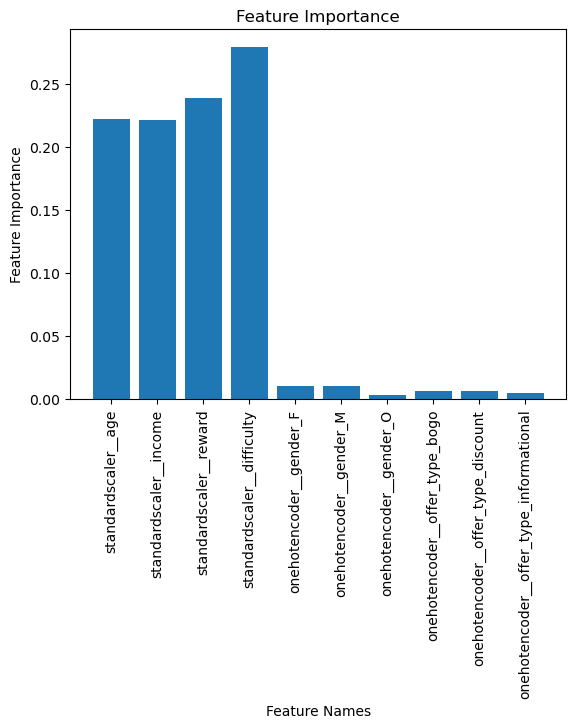

In [187]:

# Plot the feature importances
plt.bar(range(len(feature_importances)), feature_importances)
plt.xticks(range(len(feature_importances)), feature_names, rotation=90)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

Difficulty is the most important predictor